# Imports

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import keras
import matplotlib.pyplot as plt
from pathlib import Path

Using TensorFlow backend.


## Import Data

In [2]:
data_train = pd.read_csv('../data/train_rounds_filtered_merged.csv', header=None)
data_test = pd.read_csv('../data/test_rounds_filtered_merged.csv', header=None)

cards = [
# Diamonds
'DA','DK','DQ','DJ','D10','D9','D8','D7','D6',
# Hearts
'HA','HK','HQ','HJ','H10','H9','H8','H7','H6',
# Spades
'SA','SK','SQ','SJ','S10','S9','S8','S7','S6',
# Clubs
'CA','CK','CQ','CJ','C10','C9','C8','C7','C6'
]

trump = ['trump']

In [3]:
# data_train
data_train.columns = cards + trump
data_train.head()

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,CA,CK,CQ,CJ,C10,C9,C8,C7,C6,trump
0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,1,0,4
1,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
2,0,0,0,1,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,3
3,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,1,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


In [4]:
# data_test
data_test.columns = cards + trump
data_test.head()

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,CA,CK,CQ,CJ,C10,C9,C8,C7,C6,trump
0,0,1,0,0,1,0,1,1,1,0,...,0,0,0,0,1,0,0,0,0,5
1,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,5
2,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
3,0,1,0,0,0,1,1,0,0,0,...,1,1,0,0,0,1,0,0,1,3
4,1,0,0,1,0,0,0,0,1,1,...,0,0,0,1,0,0,0,1,0,2


add data column with NrD, NrH, NrS, NrC, NrA, Nr6

In [5]:
# data_train
data_train.insert(loc=len(data_train.columns), column='NrD', value=data_train.iloc[:,0:9].sum(axis=1) / 9.0)
data_train.insert(loc=len(data_train.columns), column='NrH', value=data_train.iloc[:,9:18].sum(axis=1) / 9.0)
data_train.insert(loc=len(data_train.columns), column='NrS', value=data_train.iloc[:,18:27].sum(axis=1) / 9.0)
data_train.insert(loc=len(data_train.columns), column='NrC', value=data_train.iloc[:,27:36].sum(axis=1) / 9.0)

data_train.insert(loc=len(data_train.columns), column='NrA', value=data_train.iloc[:,0:36:9].sum(axis=1) / 4.0)
data_train.insert(loc=len(data_train.columns), column='Nr6', value=data_train.iloc[:,8:36:9].sum(axis=1) / 4.0)
data_train.head()

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,C8,C7,C6,trump,NrD,NrH,NrS,NrC,NrA,Nr6
0,0,0,0,0,0,0,1,0,0,0,...,1,1,0,4,0.111111,0.333333,0.222222,0.333333,0.50,0.25
1,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0.222222,0.222222,0.222222,0.333333,0.00,0.00
2,0,0,0,1,0,1,0,0,0,0,...,0,0,1,3,0.222222,0.333333,0.111111,0.333333,0.00,0.25
3,0,1,1,0,0,1,0,0,0,0,...,1,0,0,1,0.333333,0.333333,0.222222,0.111111,0.25,0.00
4,1,0,1,0,1,1,0,0,0,0,...,0,0,0,6,0.444444,0.333333,0.222222,0.000000,0.25,0.00


In [6]:
# data_test
data_test.insert(loc=len(data_test.columns), column='NrD', value=data_test.iloc[:,0:9].sum(axis=1) / 9.0)
data_test.insert(loc=len(data_test.columns), column='NrH', value=data_test.iloc[:,9:18].sum(axis=1) / 9.0)
data_test.insert(loc=len(data_test.columns), column='NrS', value=data_test.iloc[:,18:27].sum(axis=1) / 9.0)
data_test.insert(loc=len(data_test.columns), column='NrC', value=data_test.iloc[:,27:36].sum(axis=1) / 9.0)

data_test.insert(loc=len(data_test.columns), column='NrA', value=data_test.iloc[:,0:36:9].sum(axis=1) / 4.0)
data_test.insert(loc=len(data_test.columns), column='Nr6', value=data_test.iloc[:,8:36:9].sum(axis=1) / 4.0)
data_test.head()

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,C8,C7,C6,trump,NrD,NrH,NrS,NrC,NrA,Nr6
0,0,1,0,0,1,0,1,1,1,0,...,0,0,0,5,0.555556,0.111111,0.222222,0.111111,0.00,0.25
1,0,0,0,1,0,0,0,1,0,0,...,0,1,0,5,0.222222,0.222222,0.444444,0.111111,0.00,0.50
2,0,1,1,1,0,0,0,0,0,0,...,1,1,0,0,0.333333,0.222222,0.111111,0.333333,0.00,0.25
3,0,1,0,0,0,1,1,0,0,0,...,0,0,1,3,0.333333,0.111111,0.111111,0.444444,0.25,0.25
4,1,0,0,1,0,0,0,0,1,1,...,0,1,0,2,0.333333,0.111111,0.333333,0.222222,0.50,0.25


In [7]:
#x_train = data_train.filter(items=['DJ', 'D9', 'HJ', 'H9', 'SJ', 'S9', 'CJ', 'C9', 'NrD', 'NrH', 'NrS', 'NrC', 'NrA', 'Nr6']) 
x_train = data_train
x_train.head()

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,C8,C7,C6,trump,NrD,NrH,NrS,NrC,NrA,Nr6
0,0,0,0,0,0,0,1,0,0,0,...,1,1,0,4,0.111111,0.333333,0.222222,0.333333,0.50,0.25
1,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0.222222,0.222222,0.222222,0.333333,0.00,0.00
2,0,0,0,1,0,1,0,0,0,0,...,0,0,1,3,0.222222,0.333333,0.111111,0.333333,0.00,0.25
3,0,1,1,0,0,1,0,0,0,0,...,1,0,0,1,0.333333,0.333333,0.222222,0.111111,0.25,0.00
4,1,0,1,0,1,1,0,0,0,0,...,0,0,0,6,0.444444,0.333333,0.222222,0.000000,0.25,0.00


In [9]:
# x_test = data_test.filter(items=['DJ', 'D9', 'HJ', 'H9', 'SJ', 'S9', 'CJ', 'C9', 'NrD', 'NrH', 'NrS', 'NrC', 'NrA', 'Nr6']) 
x_test = data_test
x_test.head()

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,C8,C7,C6,trump,NrD,NrH,NrS,NrC,NrA,Nr6
0,0,1,0,0,1,0,1,1,1,0,...,0,0,0,5,0.555556,0.111111,0.222222,0.111111,0.00,0.25
1,0,0,0,1,0,0,0,1,0,0,...,0,1,0,5,0.222222,0.222222,0.444444,0.111111,0.00,0.50
2,0,1,1,1,0,0,0,0,0,0,...,1,1,0,0,0.333333,0.222222,0.111111,0.333333,0.00,0.25
3,0,1,0,0,0,1,1,0,0,0,...,0,0,1,3,0.333333,0.111111,0.111111,0.444444,0.25,0.25
4,1,0,0,1,0,0,0,0,1,1,...,0,1,0,2,0.333333,0.111111,0.333333,0.222222,0.50,0.25


In [10]:
y_train_label = data_train['trump']
y_train = keras.utils.to_categorical(y_train_label, num_classes=7)

model = keras.Sequential()
model.add(keras.layers.Dense(43, activation='relu', input_shape=[43]))
model.add(keras.layers.Dense(25, activation='relu'))
model.add(keras.layers.Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=25, batch_size=100, shuffle=True)

Epoch 1/25
1650676/1650676 [==============================] - 14s 9us/step - loss: 0.0983 - accuracy: 0.9750
Epoch 2/25
1650676/1650676 [==============================] - 14s 9us/step - loss: 0.0024 - accuracy: 0.9999
Epoch 3/25
1650676/1650676 [==============================] - 14s 8us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 4/25
1650676/1650676 [==============================] - 13s 8us/step - loss: 6.4656e-04 - accuracy: 1.0000
Epoch 5/25
1650676/1650676 [==============================] - 14s 8us/step - loss: 4.5452e-04 - accuracy: 1.0000
Epoch 6/25
1650676/1650676 [==============================] - 14s 9us/step - loss: 3.4553e-04 - accuracy: 1.0000
Epoch 7/25
1650676/1650676 [==============================] - 15s 9us/step - loss: 2.7597e-04 - accuracy: 1.0000
Epoch 8/25
1650676/1650676 [==============================] - 15s 9us/step - loss: 2.2821e-04 - accuracy: 1.0000
Epoch 9/25
1650676/1650676 [==============================] - 15s 9us/step - loss: 1.9366e-04 - accuracy: 1.

In [11]:
model.summary()
print(model.get_weights())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 43)                1892      
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1100      
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 182       
Total params: 3,174
Trainable params: 3,174
Non-trainable params: 0
_________________________________________________________________
[array([[-0.0517963 , -0.14417194,  0.24757427, ...,  0.36255205,
         0.04133798,  0.23947863],
       [ 0.01191527, -0.08553478, -0.00332808, ...,  0.25444454,
        -0.18420102, -0.11826139],
       [ 0.10149246,  0.19008884,  0.09103811, ..., -0.03312633,
         0.02188098, -0.02251668],
       ...,
       [ 0.15615901, -0.0975763 ,  0.32348508, ...,  0.30438423,
    

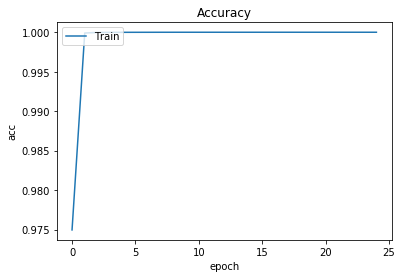

In [13]:
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['Train', 'Val'], loc='upper left')

In [14]:
history.history['accuracy'][-1]

1.0

# Predict

In [25]:
y_pred = model.predict(x_test)
print(y_pred)

[[0.0000000e+00 0.0000000e+00 3.6357030e-33 ... 1.6184789e-05
  9.9992192e-01 6.1819861e-05]
 [0.0000000e+00 0.0000000e+00 8.9465920e-33 ... 4.4978497e-06
  9.9998617e-01 9.2834716e-06]
 [9.9996984e-01 3.0167183e-05 1.2059548e-11 ... 2.7043621e-22
  2.3612249e-38 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.8227109e-16
  1.1916085e-06 9.9999881e-01]
 [0.0000000e+00 0.0000000e+00 3.4239289e-33 ... 5.2577952e-06
  9.9997437e-01 2.0443009e-05]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.7664482e-17
  2.0503876e-05 9.9997950e-01]]


In [26]:
print(y_pred[0])
result = np.where(y_pred[0] == np.amax(y_pred[0]))
print(x_test.head(1))
print(result[0][0])

[0.0000000e+00 0.0000000e+00 3.6357030e-33 1.1297313e-17 1.6184789e-05
 9.9992192e-01 6.1819861e-05]
   DA  DK  DQ  DJ  D10  D9  D8  D7  D6  HA  ...  C8  C7  C6  trump       NrD  \
0   0   1   0   0    1   0   1   1   1   0  ...   0   0   0      5  0.555556   

        NrH       NrS       NrC  NrA   Nr6  
0  0.111111  0.222222  0.111111  0.0  0.25  

[1 rows x 43 columns]
5


In [37]:
TOTAL_COUNT = len(x_test)
CORRECT_COUNT = 0

for i in range(0,len(y_pred)):
    global CORRECT_TRUMP
    
    predicted_trump = np.where(y_pred[i] == np.amax(y_pred[i]))[0][0]
    real_trump = x_test.head(i+1).iloc[0]['trump']
    
    #print(predicted_trump)
    #print(real_trump)
    
    if int(predicted_trump) == int(real_trump):
        CORRECT_COUNT = CORRECT_COUNT + 1

accuracy = (CORRECT_COUNT / TOTAL_COUNT) * 100
print(f'Total Count  : {TOTAL_COUNT}')
print(f'Correct Count: {CORRECT_COUNT}')
print(f'Accuracy     : {accuracy}')






Total Count  : 549162
Correct Count: 68213
Accuracy     : 12.42128916421748
